In [1]:
# Before starting import everything necessary
import setGPU

import getpass
import numpy as np
import os
import simplejson as json
import sys
import torch
import yaml

from IPython.display import Markdown as md

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import get_data_loader

setGPU: Setting GPU to: 0


In [2]:
# Set presentation settings
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import SymLogNorm

with open('../plots/palette.json') as json_file:
    color_palette = json.load(json_file)
plt.style.use('../plots/ssdjet.mplstyle')

In [3]:
# Get access to files in EOS
os.system('echo %s | kinit' % getpass.getpass())

········


0

In [4]:
# Load configuration
CONFIG_FILE = '../ssd-config.yml'
config = yaml.safe_load(open(CONFIG_FILE))
ssd_settings = config['ssd_settings']

In [5]:
targets_train = np.empty((0, 6))
for x in config['dataset']['train']:
    loader = get_data_loader(x,
                             1,
                             0,
                             ssd_settings['input_dimensions'],
                             ssd_settings['object_size'],
                             return_pt=True,
                             raw=True,
                             shuffle=False)
    
    for _, target in iter(loader):
        for t in target:
            targets_train = np.vstack((targets_train, t.cpu()))

In [6]:
targets_validation = np.empty((0, 6))
for x in config['dataset']['validation']:
    loader = get_data_loader(x,
                             1,
                             0,
                             ssd_settings['input_dimensions'],
                             ssd_settings['object_size'],
                             return_pt=True,
                             raw=True,
                             shuffle=False)
    
    for _, target in iter(loader):
        for t in target:
            targets_validation = np.vstack((targets_validation, t.cpu()))

In [7]:
targets_test = np.empty((0, 6))
for x in config['dataset']['test']:
    loader = get_data_loader(x,
                             1,
                             0,
                             ssd_settings['input_dimensions'],
                             ssd_settings['object_size'],
                             return_pt=True,
                             raw=True,
                             shuffle=False)
    
    for _, target in iter(loader):
        for t in target:
            targets_test = np.vstack((targets_test, t.cpu()))

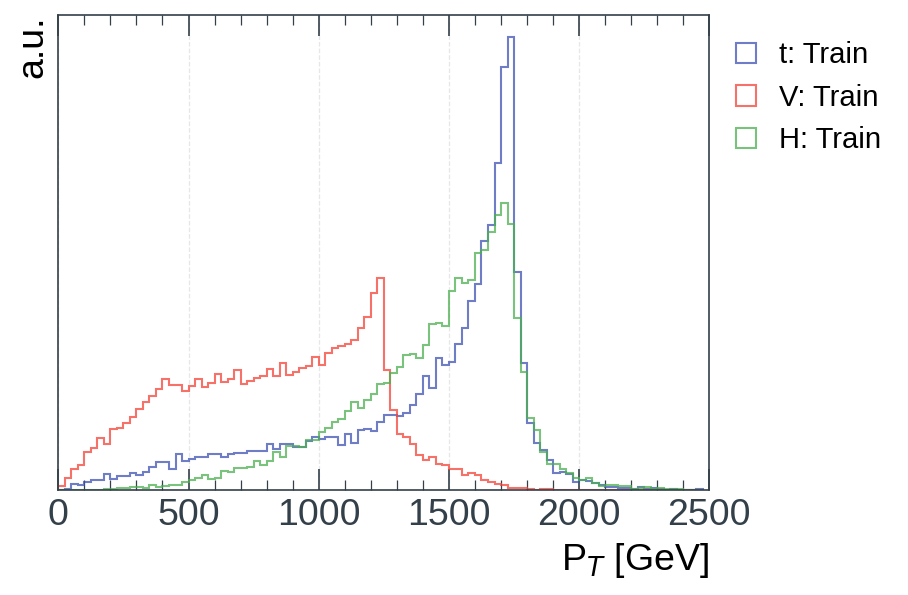

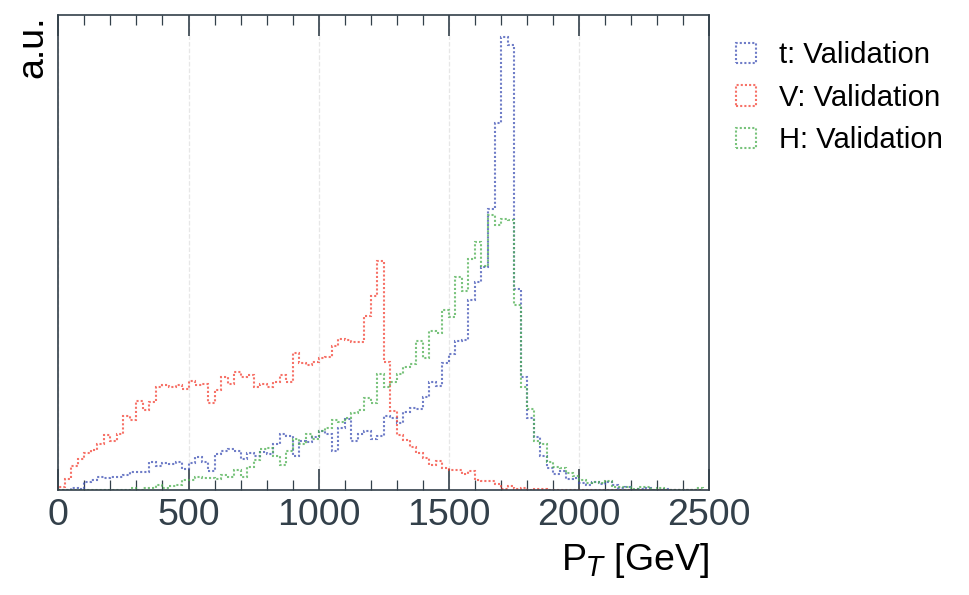

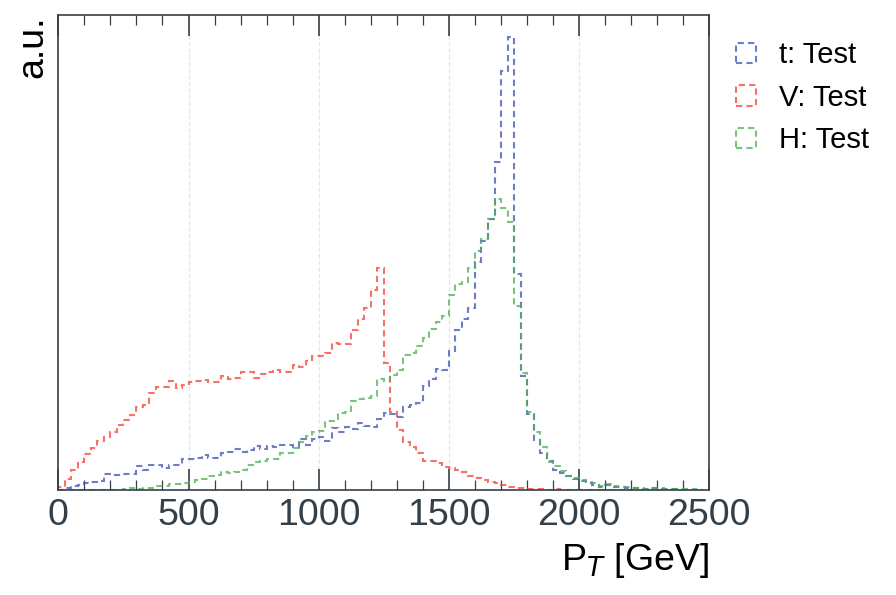

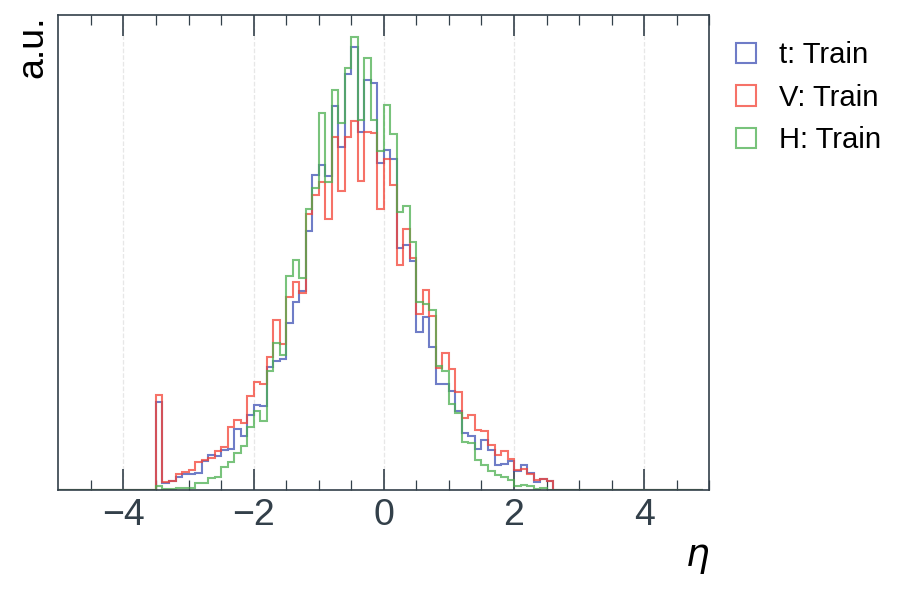

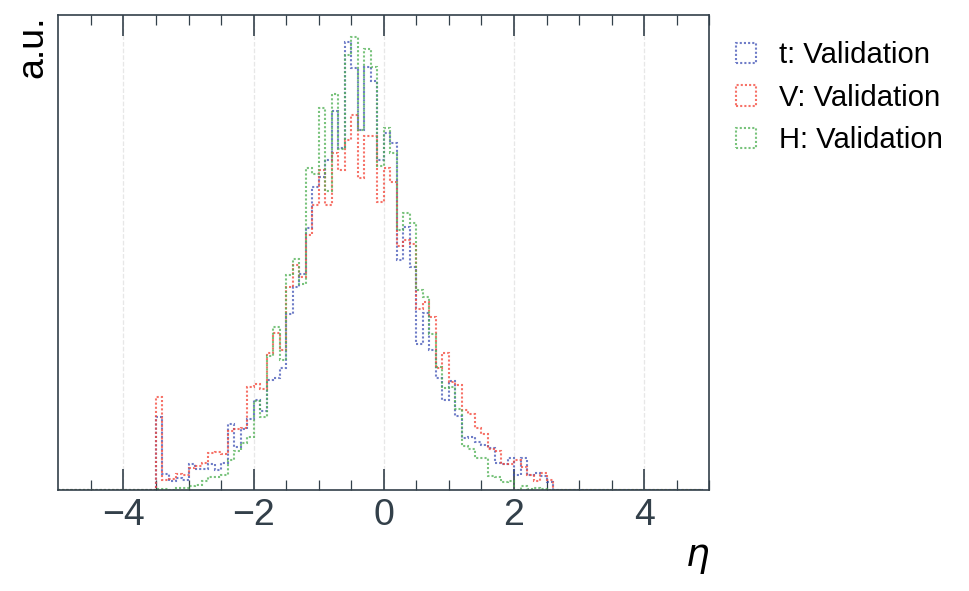

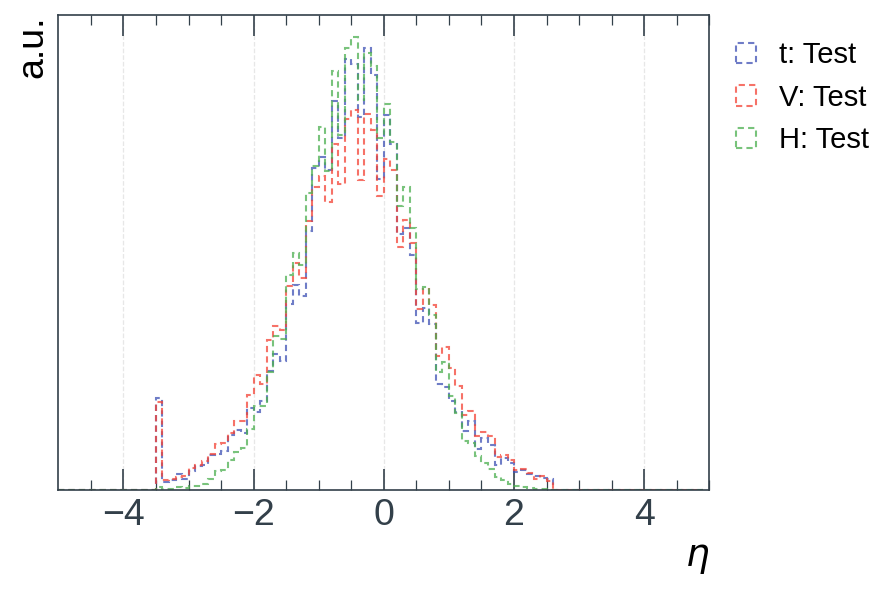

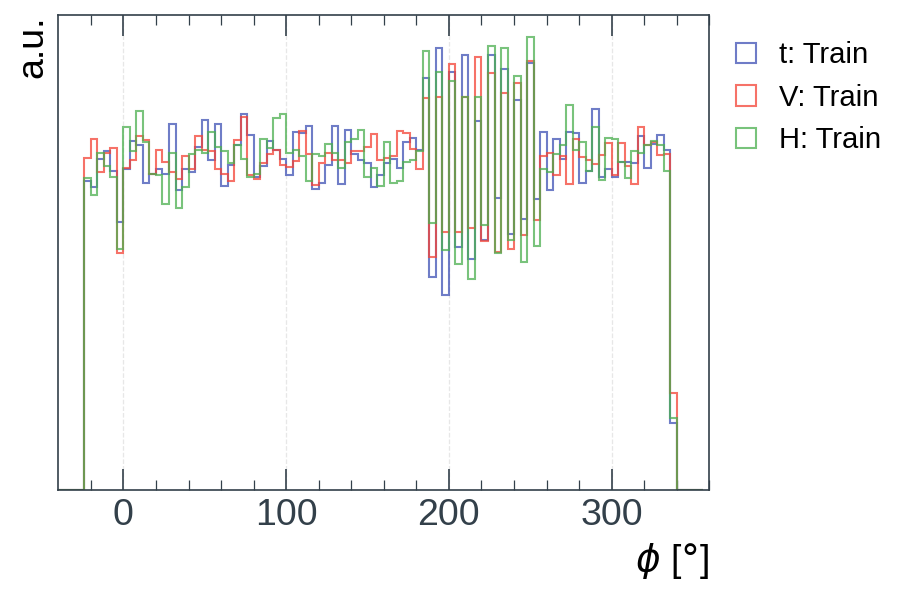

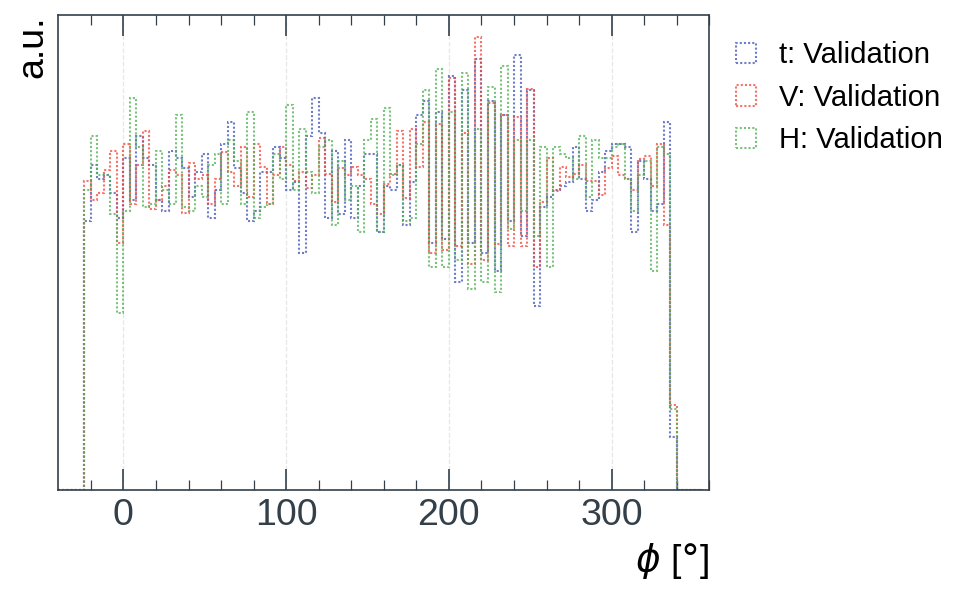

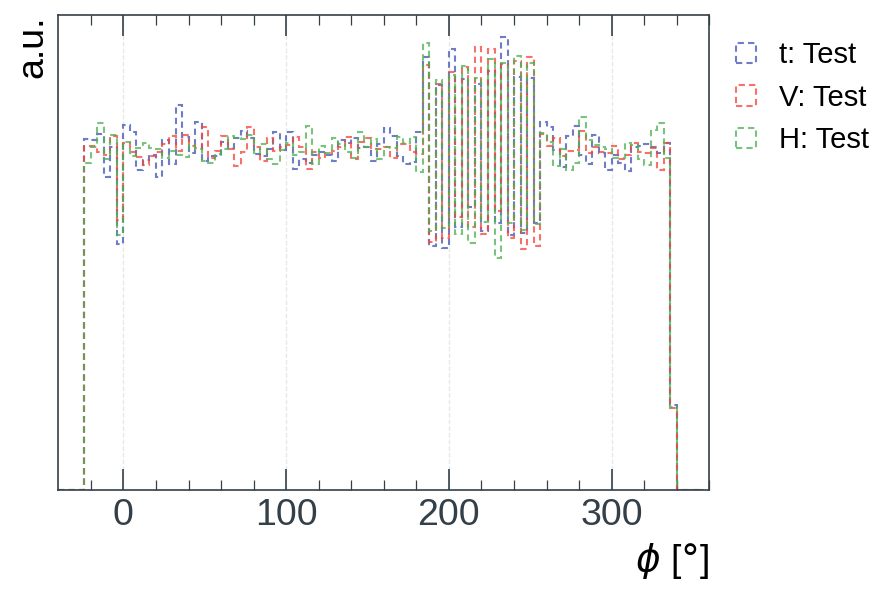

In [8]:
colors = ['indigo', 'red', 'green']
labels = ['Train', 'Validation', 'Test']
styles = [(0, ()), (0, (1, 1)), (0, (3, 2))]
nbins = 100

for x, label, (bin_min, bin_max), multiplier, subtrahend, name in [(-1, "P$_T$ [GeV]", (0, 2500), 1, 0, 'pt'),
                                                                   (0, "$\eta$", (-5, 5), 6, 3, 'eta'),
                                                                   (1, '$\phi$ [$\degree$]', (-40, 360), 360, 0, 'phi')]:

    
    for i, targets in enumerate([targets_train, targets_validation, targets_test]):
        fig = plt.figure()
        for j, jet in enumerate(config['evaluation_pref']['names_classes']):
            values = targets[targets[:, -2] == (j + 1)][:, x]
            values = values * multiplier - subtrahend

            # the histogram of the data
            plt.hist(values,
                     density=True,
                     facecolor=None,
                     bins= np.arange(bin_min, bin_max, (bin_max-bin_min) / nbins),
                     label='{}: {}'.format(jet, labels[i]),
                     histtype='step',
                     ls=styles[i],
                     edgecolor=color_palette[colors[j]]['shade_500'],
                     alpha=0.75)

        plt.xlabel(label, horizontalalignment='right', x=1.0)
        plt.ylabel("a.u.", horizontalalignment='right', y=1.0)
        plt.legend(bbox_to_anchor=(1, 1))
        plt.xlim(bin_min, bin_max)
        plt.grid(True)
        plt.yticks([])
        fig.savefig('../plots/dataset-profile-{0}-{1}'.format(name, i))
        plt.show();

In [9]:
count = np.zeros((3, 3))
labels = ['Train', 'Validation', 'Test']
for i, targets in enumerate([targets_train, targets_validation, targets_test]):
    for j, jet in enumerate(config['evaluation_pref']['names_classes']):
        x = targets[targets[:, -2] == (j + 1)]
        count[j, i] = len(x)

md('''| | Train | Validation | Test |
| --- | --- | --- | --- |
| t | {} | {} | {} |
| V | {} | {} | {} |
| H | {} | {} | {} |'''.format(*list(count.flatten())))

| | Train | Validation | Test |
| --- | --- | --- | --- |
| t | 60000.0 | 24000.0 | 60000.0 |
| V | 120000.0 | 47997.0 | 119996.0 |
| H | 60000.0 | 24000.0 | 60000.0 |